<a href="https://colab.research.google.com/github/hyeonjun/AlphaZero/blob/master/6_1_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 알파제로를 활용한 틱택토

알파제로의 알고리즘은 몬테카를로 트리탐색을 기반으로 한다. 몬테카를로 트리 탐색을 활용한 '앞을 읽는 능력', 딥러닝을 활용한 국면에서의 가장 좋은 수를 예측하는 '직감', 강화 학습을 활용한 셀프 플레이의 '경험'을 조합해 사람을 뛰어넘는 최강의 인공지능을 실현한다.

오리지널 알파제로는 5,000개의 TPU라는 풍부한 환경에서 각 부분을 비동기적으로 병렬 실행함으로써 막대한 양의 학습을 수행한다. 그만한 환경을 구하기에는 매우 어렵다. 그래서 알파제로를 기반으로 1대의 GPU 머신으로 순차적으로 동작하도록 규모를 축소해서 구현한다.

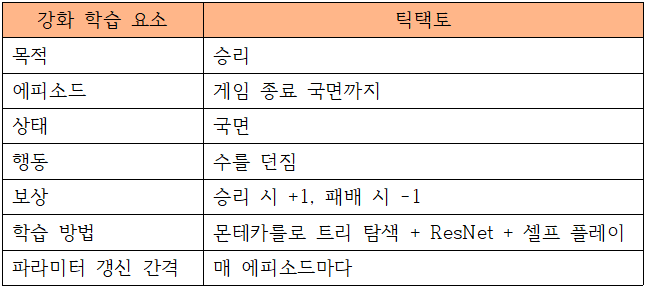

# 알파제로의 강화 학습 사이클

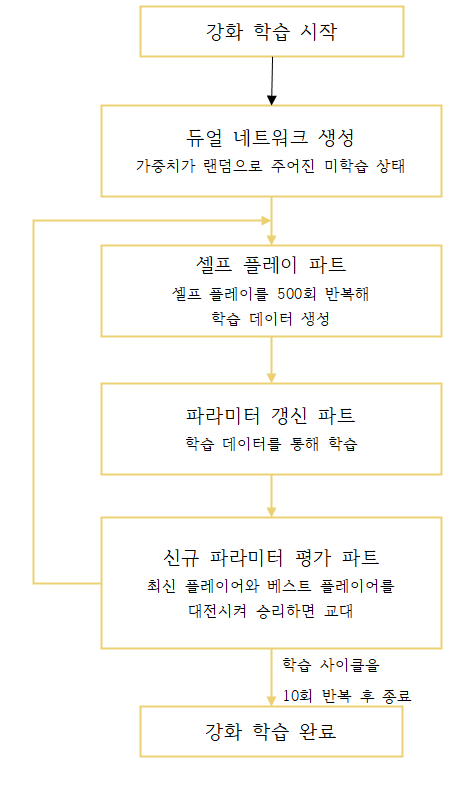

* 듀얼 네트워크 생성
'듀얼 네트워크 생성'에서는 뉴럴 네트워크의 구성을 정의하고 '베스트 플레이어(과거 최강)'모델을 생성한다.

알파제로의 뉴럴 네트워크는 현재 국면에 대해 '정책','가치'의 두 가지 출력을 '듀얼 네트워크'를 사용한다. 최초에는 가중치 랜덤으로 주어진 미학습 상태이기 때문에 매우 약한 상태에서 시작한다. 이를 학습과 평가에 따라 즉시 갱신한다.

* 셀프 플레이 파트
'셀프 플레이 파트'에서는 베스트 플레이어 모델을 사용해 '셀프 플레이'를 수행한다. '셀프 플레이'란 인공지능끼리 게임이 종료될 때까지 플레이하는 것이다. 이를 통해 뉴럴 네트워크의 학습에 이용할 '학습 데이터(정책과 가치)'를 생성한다.

* 파라미터 갱신 파트
'파라미터 갱신 파트'에서는 셀프 플레이에서 생성한 학습 데이터를 사용해 '최신 플레이어'를 학습시킨다. '최신 플레이어'의 초기 상태는 베스트 플레이어를 복사해서 사용한다.

* 신규 파라미터 평가 파트
'신규 파라미터 평가 파트'에서는 최신 플레이어와 베스트 플레이어를 대전시키고, 충분히 앞선 경우에는 교대한다. 이와 같이 학습을 통해 강해지지 않으면 그 학습을 채택하지 않는다.


*** 오리지널 알파제로에서의 신규 파라미터 평가 파트
- 신규 파라미터 평가 파트는 알파고, 알파고 제로에서의 구조로 오리지널 알파제로에는 포함되지 않는 방법이지만, 여기에서는 학습 횟수가 적기 때문에 효과가 있다고 판단하여 적용한 것.


In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
!python ./drive/MyDrive/알파제로/AlphaZero/game.py


o--
---
---

o--
---
--x

o--
---
-ox

o--
--x
-ox

o--
-ox
-ox

o-x
-ox
-ox



In [ ]:
from google.colab import files
upload = files.upload()

!dir

Saving game.py to game.py
game.py  sample_data


In [ ]:
!python game.py

---
-o-
---

x--
-o-
---

xo-
-o-
---

xo-
-o-
x--

xo-
oo-
x--

xo-
oox
x--

xo-
oox
x-o

xo-
oox
xxo

xoo
oox
xxo

